# 🔵 EJERCICIO 3: La Incubadora (Pesos Negativos e Inhibición)

En este ejercicio programaremos una neurona para controlar una **Incubadora de Cultivos Celulares**.

**El Problema:**
Las células son muy sensibles. Mueren si el ambiente se vuelve **Caliente y Seco**.
Tenemos dos sensores:
1.  **Temperatura ($T$):** Rango 30°C - 45°C.
2.  **Humedad ($H$):** Rango 20% - 90%.

**Lógica de la Alarma (Clase 1):**
Queremos que la alarma se active si $T$ es ALTA **Y** $H$ es BAJA.

**Concepto Clave: Pesos Negativos**
La neurona deberá aprender por sí sola que:
* El peso de la Temperatura ($w_t$) debe ser **Positivo** (Excitatorio).
* El peso de la Humedad ($w_h$) debe ser **Negativo** (Inhibitorio), porque a mayor humedad, *menor* riesgo.

La fórmula será: $Z = (w_t \cdot T) + (w_h \cdot H) + b$

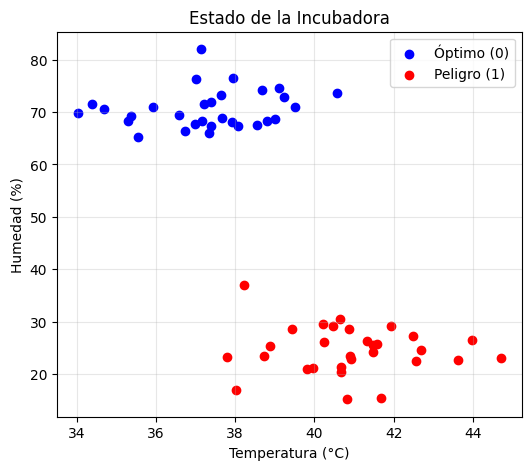

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

# --- 1. SIMULACIÓN DE DATOS (Incubadora) ---

# CLASE 0: AMBIENTE ÓPTIMO (Seguro)
# Temp moderada (37°C) y Humedad Alta (>60%)
# Generamos 30 muestras
optimo_temp = np.random.normal(37, 1.5, 30)
optimo_hum  = np.random.normal(70, 5, 30)
optimo = np.column_stack((optimo_temp, optimo_hum))
labels_optimo = np.zeros(30) # Salida 0 (Apagar Alarma)

# CLASE 1: PELIGRO (Caliente y Seco)
# Temp alta (>40°C) y Humedad Baja (<30%)
peligro_temp = np.random.normal(41, 1.5, 30)
peligro_hum  = np.random.normal(25, 5, 30)
peligro = np.column_stack((peligro_temp, peligro_hum))
labels_peligro = np.ones(30) # Salida 1 (Encender Alarma)

# Unimos los datos
X_raw = np.vstack((optimo, peligro))
y = np.concatenate((labels_optimo, labels_peligro))

# Visualizamos para entender el problema geométrico
plt.figure(figsize=(6, 5))
plt.scatter(optimo[:,0], optimo[:,1], c='blue', label='Óptimo (0)')
plt.scatter(peligro[:,0], peligro[:,1], c='red', label='Peligro (1)')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.legend()
plt.title("Estado de la Incubadora")
plt.grid(True, alpha=0.3)
plt.show()

## 3.2 Normalización y Entrenamiento

Al igual que en el ejercicio del reloj, las escalas son diferentes (Temp ~40, Humedad ~70).
Es obligatorio normalizar para que la neurona compare "peras con peras".

Entrenaremos el perceptrón manual con los datos normalizados.

In [ ]:
# A. PREPROCESAMIENTO
scaler_inc = StandardScaler()
X_scaled = scaler_inc.fit_transform(X_raw)

# B. FUNCIÓN DE ENTRENAMIENTO (La misma del ejercicio anterior)
def entrenar_perceptron_v3(X, y, epochs=100, tasa=0.05):
    # 2 Entradas -> 2 Pesos
    weights = np.zeros(2)
    bias = 0.0

    for epoch in range(epochs):
        errores = 0
        for i in range(len(X)):
            # Cálculo Z
            z = np.dot(X[i], weights) + bias

            # Activación
            pred = 1 if z >= 0 else 0

            # Aprendizaje
            error = y[i] - pred
            if error != 0:
                weights += tasa * error * X[i]
                bias += tasa * error
                errores += 1

        if errores == 0:
            break

    return weights, bias

# C. EJECUTAR ENTRENAMIENTO
w_final, b_final = entrenar_perceptron_v3(X_scaled, y)

print("¡Neurona calibrada exitosamente!")
print("Medias:", scaler_inc.mean_)
print("Desviaciones estándar:", scaler_inc.scale_)

¡Neurona calibrada exitosamente!
Medias: [39.09488639 47.58435841]
Desviaciones estándar: [ 2.41115511 23.3581082 ]


## 3.3 Interpretación de Pesos (Lo más importante)

Aquí verificaremos nuestra hipótesis.
Esperamos ver:
1.  **Peso Temperatura ($w_0$):** Positivo (+). Si sube la temp, aumenta $Z$ (acerca a la alarma).
2.  **Peso Humedad ($w_1$):** Negativo (-). Si sube la humedad, resta $Z$ (aleja de la alarma).

Esto demuestra que la neurona aprendió que **la humedad es buena**.

In [ ]:
print(f"--- ANÁLISIS DEL CEREBRO DE LA INCUBADORA ---")
print(f"Peso Temperatura: {w_final[0]:.4f}  (¿Es positivo? Sí, excita la alarma)")
print(f"Peso Humedad:     {w_final[1]:.4f} (¿Es negativo? Sí, inhibe la alarma)")
print(f"Bias (Sesgo):     {b_final:.4f}")

print("\nConclusión Matemática:")
print("La neurona aprendió a restar puntos si hay buena humedad.")

--- ANÁLISIS DEL CEREBRO DE LA INCUBADORA ---
Peso Temperatura: 0.0343  (¿Es positivo? Sí, excita la alarma)
Peso Humedad:     -0.0816 (¿Es negativo? Sí, inhibe la alarma)
Bias (Sesgo):     0.0000

Conclusión Matemática:
La neurona aprendió a restar puntos si hay buena humedad.


## 3.4 Visualización de la Frontera de Decisión

Como este problema es 2D (Temperatura vs Humedad), podemos dibujar la **línea exacta** que la neurona está usando para separar la vida de la muerte.

La línea se forma donde $Z = 0$.
Ecuación de la recta: $w_0 \cdot x + w_1 \cdot y + b = 0$

In [ ]:
# Crear gráfico base con los datos normalizados
plt.figure(figsize=(7, 6))
plt.scatter(X_scaled[y==0][:,0], X_scaled[y==0][:,1], c='blue', label='Seguro')
plt.scatter(X_scaled[y==1][:,0], X_scaled[y==1][:,1], c='red', label='Peligro')

# Calcular la línea de decisión (Matemática de recta: y = mx + c)
# Despejamos la Humedad (y) de la formula del perceptrón
x_vals = np.linspace(-2, 2, 100)
pendiente = -(w_final[0] / w_final[1])
interseccion = -(b_final / w_final[1])
y_vals = pendiente * x_vals + interseccion

plt.plot(x_vals, y_vals, 'g--', linewidth=3, label='Frontera de la Neurona')
plt.title("Lo que la IA aprendió (Datos Normalizados)")
plt.xlabel("Temperatura (Z-Score)")
plt.ylabel("Humedad (Z-Score)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3.5 Simulación de Sensores Reales

Finalmente, probemos el sistema con valores reales de sensores.
Recuerda: **Siempre debemos normalizar** el dato nuevo antes de pasarlo por la fórmula.

Probaremos 3 casos:
1.  **Ideal:** 37°C y 70% Humedad.
2.  **Desierto:** 42°C y 20% Humedad.
3.  **Sauna (Trampa):** 40°C y 90% Humedad. (Alta temp, pero mucha humedad... ¿Qué hará la red?)

In [ ]:
# Casos de prueba reales
casos = [
    {"Nombre": "Condición Ideal",  "T": 37.0, "H": 70.0},
    {"Nombre": "Error Crítico",    "T": 42.0, "H": 20.0}, # Caliente y Seco
    {"Nombre": "Efecto Sauna",     "T": 40.0, "H": 90.0}, # Caliente pero Húmedo
    {"Nombre": "Frio y Seco",      "T": 30.0, "H": 20.0}  # Frio y Seco
]

print(f"{'ESCENARIO':<15} | {'TEMP':<6} | {'HUMEDAD':<8} | {'SCORE Z':<10} | {'ESTADO ALARMA'}")
print("-" * 70)

for c in casos:
    # 1. Crear vector
    input_raw = np.array([[c["T"], c["H"]]])

    # 2. Normalizar (Vital)
    input_norm = scaler_inc.transform(input_raw)[0]

    # 3. Calcular Fórmula
    z_score = np.dot(input_norm, w_final) + b_final

    # 4. Decisión
    estado = "🚨 SONANDO" if z_score >= 0 else "✅ SILENCIO"

    print(f"{c['Nombre']:<15} | {c['T']:<6} | {c['H']:<8} | {z_score:+.4f}     | {estado}")

print("-" * 70)

ESCENARIO       | TEMP   | HUMEDAD  | SCORE Z    | ESTADO ALARMA
----------------------------------------------------------------------
Condición Ideal | 37.0   | 70.0     | -0.1081     | ✅ SILENCIO
Error Crítico   | 42.0   | 20.0     | +0.1377     | 🚨 SONANDO
Efecto Sauna    | 40.0   | 90.0     | -0.1353     | ✅ SILENCIO
Frio y Seco     | 30.0   | 20.0     | -0.0330     | ✅ SILENCIO
----------------------------------------------------------------------


## 3.6 Análisis de Resultados: El "Efecto Sauna"

El caso de prueba etiquetado como **"Efecto Sauna" (40°C, 90% Humedad)** es pedagógicamente el más interesante de este ejercicio, ya que ilustra la **competencia de variables**.

Observa la dinámica interna de la ecuación matemática $Z = (w_t \cdot T) + (w_h \cdot H) + b$:

1.  **La Temperatura (40°C):** Al ser alta y multiplicarse por un peso positivo ($w_t$), **empuja el Score $Z$ hacia arriba** (hacia la zona de Peligro/Alarma).
2.  **La Humedad (90%):** Al ser muy alta pero multiplicarse por un peso negativo ($w_h$), **empuja el Score $Z$ hacia abajo** (hacia la zona de Seguridad/Silencio).

**Conclusión:**
Como la humedad es tan alta en este caso, logra **"cancelar" o compensar** el efecto negativo de la temperatura alta, manteniendo el resultado final por debajo de 0 (Alarma Apagada).

Esto nos enseña una lección fundamental de la Bio-Ingeniería: **Las neuronas no toman decisiones basadas en una sola variable, sino que "balancean" fuerzas opuestas (Excitatorias vs. Inhibitorias) para llegar a un consenso matemático.**